# Clase 2 - Introducción al uso de máquina virtual y a la programación en Python

### Temas 
- Repaso de planteamiento de ecuaciones diferenciales y su solución a mano (crecimiento de bacterias, decaimiento radioactivo, ley de enfriamiento de Newton, ecuación del dogma central de la biología molecular y espacio de Crick)
- Introduccióń a la máquina virtual para la clase (ET357 Ubuntu 16.04)
- Comandos básicos en la terminal (ls, cd, mv, cp)
- Introducción a Jupyter Lab y comandos básicos
- Programación básica en Python 
- Programación en Python para ingeniería (módulos numpy y matplotlib)

## Ecuación diferencial del crecimiento de bacterias
El crecimiento de una colonia de bacterias es proporcional al número de bacterias presentes. Si la colonia se duplica cada 3 horas y comienza con 200 bacterias, ¿cuántas bacterias habrá después de 8 horas?

### Paso 1 - Plantea la ecuación diferencial
Llamemos $X(t)$ al número de bacterias presentes en la colonia cuando el tiempo es igual a $t$. El crecimiento del número de bacterias es un *cambio en el tiempo*, o sea, una derivada. Por lo tanto:
$$\frac{dX}{dt}\propto X(t)$$  

$$\frac{dX}{dt} = kX(t)$$ 

Donde $k$ es una constante de proporcionalidad cuyo valor desconocemos aún. 

### Paso 2 - Resuelve la ecuación diferencial
Para resolver esta E.D. y encontrar el valor de $X(t)$, usaremos separación de variables:
$$\frac{dX}{X(t)}=kdt$$ 

$$\int \frac{dX}{X(t)} = \int kdt$$ 

$$ln(X(t)) + C_1 = kt + C_2$$

Donde $C_1$ y $C_2$ son **constantes de integración**. Estas constantes de integración pueden sumarse/restarse y dar lugar a una constante de integración $C_3 = C_2 - C_1$ y tenemos:

$$ln(X(t)) = kt + C_3$$ 

$$e^{ln(X(t))} = e^{kt+C_3}$$ 

$$X(t) = e^{kt}e^{C_3}$$ 

$$X(t) = Ce^{kt}$$

Donde $C = e^{C_3}$ es otra constante

### Paso 3 - Encuentra el valor de C y k

Ahora que sabemos que $X(t) = Ce^{kt}$, podemos encontrar el valor de $C$ usando las **condiciones iniciales** del problema. Eso es, el numero de bacterias al comienzo cuando $t = 0$, o sea $X(t=0)=X(0)=200$

$$X(0) = Ce^0$$ 

$$200 = C = X_0$$

Donde $X_0$ representa el numero de bacterias al inicio.

Ahora solamente falta encontrar el valor de $k$. Para ello, usaremos el dato sobre cada cuanto tiempo se duplica la colonia. Sabemos que la colonia tendra el doble de bacterias que tenia al inicio despues de 3 horas. Esto quiere decir que $X(t=3) = 2X(t=0) = 2X_0$. Entonces:

$$2X_0 = X_0e^{3k}$$ 

Resolviendo para k, tenemos:

$$\frac{2X_0}{X_0} = e^{3k}$$ 

$$ln(2) = 3k$$

$$\frac{ln(2)}{3} = k \approx 0.231 $$

**NOTA**
En microbiología, al valor de $k$ se le conoce como *tasa de crecimiento de la colonia*

Y de esta manera, nuestra ecuación diferencial final queda como:

$$X(t) = 200e^{0.231t}$$

### Paso 4 - Encuentra el valor X(t) cuando t = 8

Simplemente sustituimos t por 8 en la ecuacion anterior para obtener el número de bacterias que tiene la colonia después de 8 horas de haber estado creciendo

$$X(8) = 200e^{0.231\times 8} = 200e^{6.35} \approx 1270$$ 

### Paso 5 - Haz una gráfica de $X(t)$ para ver el crecimiento de bacterias en el tiempo desde t=0 hasta t=12

In [1]:
# Importar librerías de Python para cálculos numéricos (Numpy) y para graficar (Matplotlib)
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Declara constantes y variables
X0 = 200.0 # Bacterias al inicio
k = np.log(2.0)/3.0 # Tasa de crecimiento
t = np.linspace(0.0,12.0) # Puntos en el tiempo desde 0 hasta 12
X = X0 * np.exp(k*t)

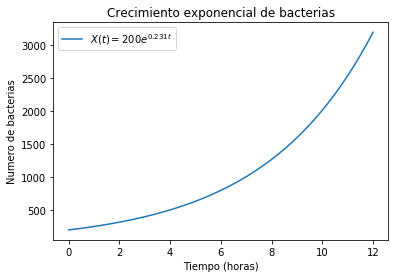

In [12]:
# Grafica X con respecto al tiempo t
plt.plot(t,X,label='$X(t)=200e^{0.231t}$')
plt.xlabel('Tiempo (horas)') # Agrega texto en el eje horizontal
plt.ylabel('Numero de bacterias') # Agrega text en el eje vertical
plt.title('Crecimiento exponencial de bacterias') # Agrega un titulo a tu grafica
plt.legend(loc='best') # Agrega una leyanda a la grafica en la mejor posicion posible

# **Tarea - Resolver la siguiente ecuacion diferencial a mano y graficar la solucion con Python**
La masa de isótopo radioactivo de yodo-131 (I-131) **decae** en el tiempo a una tasa que es proporcional a la masa de I-131 presente. Se sospecha que un paciente podría tener un tumor en la gládula tiroidea. Para confirmar esto por medio de imagenología, el paciente recibe una inyección con 50 miligramos (50 mg) de I-131. Si la **vida media** (o sea, el tiempo que debe pasar para que la masa de I-131 decaiga a la mitad) es de 8 días, contesta lo siguiente:

1. ¿Cuántos miligramos de I-131 se encuentran circulando en el paciente a los 2 días de haber recibido la inyección?
2. ¿Cuántos días tienen que pasar para que el paciente tenga solamente 10% de la dosis inicial de I-131 circulando en su sangre?
3. ¿Cuál es la tasa de decaimiento $k$ que obtuviste al resolver la ecuación diferencial?
4. Haz una gráfica del decaimiento de I-131 durante el primer mes después de la inyección (desde t=0 hasta t=30, recuerda que $t$ expresa días y no horas)
5. ¿Qué tan rápido decae el I-131 cuando t=5? ¿Y qué tal cuando t=10?

## Pista
Digamos que M(t) es la masa de I-131 con respecto al tiempo, entonces: 

$$\frac{dM}{dt} \propto -M(t)$$ 

# Solución

### EDO

$$\frac{dM}{dt} = -kM(t)$$

### Al resolver la EDO, se obtiene

$$M(t) = Ce^{-kt}$$

### Usamos la condicion inicial ($M(t=0)$) para encontrar el valor de C

$$M(0) = M_0 = C$$

$$50 = C$$

$$M(t) = 50e^{-kt}$$ 

### Usamos la vida media del I-131 ($t=8$) para encontrar el valor de $k$

$$M(t=8) = \frac{1}{2}M_0 = M_0e^{-8k}$$

$$\frac{ln(\frac{1}{2})}{-8} = k \approx 0.0866$$

Por lo tanto,

$$M(t) = 50e^{-0.0866t}$$

## 1. Miligramos de I-131 en paciente dos días después de la inyección

$$M(t=2) = 50e^{-0.0866\times2}$$

$$M(2) \approx 42 $$

## 2. Días que deben pasar para que el paciente tenga solamente 10% de la dosis (5 mg)

$$M(t_{10}) = 5 = 50e^{-0.0866t_{10}}$$

$$\frac{ln(\frac{1}{10})}{-0.0866} = t_{10}$$

$$27 \approx t_{10}$$

## 3. Tasa de decaimiento del I-131

$$k \approx 0.0866 [1/dia]$$

## 4. Grafica de M(t) desde t = 0 hasta t = 30

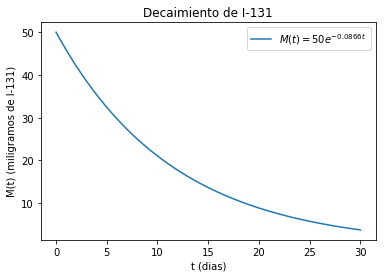

In [2]:
# Define variables y constantes
M0 = 50
t = np.linspace(0,30)
k = 0.0866
M = M0 * np.exp(-k*t)

# Genera la grafica
plt.plot(t,M,label='$M(t) = 50e^{-0.0866t}$')
plt.xlabel('t (dias)')
plt.ylabel('M(t) (miligramos de I-131)')
plt.title('Decaimiento de I-131')
plt.legend()

## 5. Rapidez de decaimiento cuando t = 5

La rapidez de decaimiento se refiere a $\frac{dM}{dt}$ por lo que derivamos $M(t)$ con respecto a $t$

$$\frac{dM}{dt}= \frac{d}{dt}(50e^{-0.0866t})$$

$$\frac{dM}{dt} = (-0.0866)50e^{-0.0866t}$$

$$\frac{dM}{dt} = -4.33e^{-0.0866t}$$

### Cuando t = 5

$$\frac{dM}{dt}_{t=5} = -4.33e^{-0.0866*5} = -2.8$$

(En unidades de $\frac{mg}{dia}$)

### Cuando t = 10

$$\frac{dM}{dt}_{t=5} = -4.33e^{-0.0866*10} = -1.8$$

# Ecuación diferencial sobre la ley de enfriamiento de Newton (resolver a mano en la clase)

La velocidad con la que se enfría un objecto es proporcional a la diferencia de temperatura entre el objeto y la temperatura del ambiente en el que se encuentra. 

Llamemos $H(t)$ a la temperatura de un objeto como función del tiempo. Supongamos que la temperatura del medio ambiente es constante con un valor de $A$. Entonces:

$$\frac{dH}{dt} \propto (H-A)$$

$$\frac{dH}{dt} = -k(H-A)$$

Para resolver esta ecuación diferencial necesitamos utilizar **cambio de variable**:

$$u = H - A$$

$$\frac{du}{dt} = \frac{dH}{dt} - \frac{dA}{dt}$$

Pero $A$  es una constante, por lo que $\frac{dA}{dt}=0$ y por lo tanto $\frac{du}{dt} = \frac{dH}{dt}$

La ecuación diferencial por lo tanto es:

$$\frac{du}{dt}=-ku$$ 

Y al igual que resolvimos la ecuación sobre el crecimiento de bacterias, la solucion $u(t)$ es:

$$u(t)=Ce^{-kt}$$

$$H(t) - A = Ce^{-kt}$$

$$H(t) = A + Ce^{-kt}$$

La gráfica de H(t) generada con Python se muestra abajo para valores $A = 37 C^o, k=1.2, C=H_0=100 C^o$ para una ventana de tiempo que va desde t = 0 horas hasta t = 8 horas

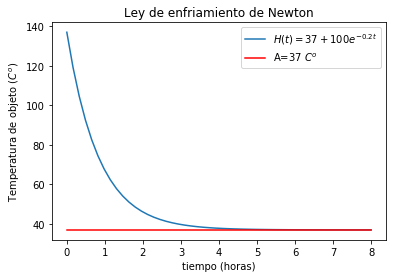

In [13]:
t = np.linspace(0.0,8.0)
A = 37.0 # Temperatura ambiente
H0 = 100.0 # Temperatura inicial del objeto
k = 1.2 # Constante de rapidez de enfriamiento

H = A + H0*np.exp(-k*t)
plt.plot(t,H,label='$H(t)=37 + 100e^{-0.2t}$')
plt.plot(t,[A]*len(t),'r',label='A=37 $C^o$') # Gráfica de la asíntota (la temperatura ambiente)
plt.xlabel('tiempo (horas)')
plt.ylabel('Temperatura de objeto ($C^o$)')
plt.title('Ley de enfriamiento de Newton')
plt.legend(loc='best')

# Ecuaciones para entender la cantidad de proteinas en una celula y el espacio de Crick (resolver en clase)

Consideremos el proceso de expresión genética:

$$[DNA] \xrightarrow{\beta_{m}} [mRNA] \xrightarrow{\beta_{p}} [Proteína]$$

Donde $\beta_{m},\beta_{p}$ son las constantes de transcripcion y traduccion, respectivamente. Ahora, asumamos que el mRNA y la proteina se degradan con constantes de degradacion $\alpha_{m},\alpha_{p}$. 

$$[mRNA] \xrightarrow{\alpha_{m}} []$$

$$[Proteina] \xrightarrow{\alpha_{p}} []$$

Entonces podemos definir las siguientes ecuaciones diferenciales para representar la tasa de produccion de mRNA y de proteina:

- Primero, la tasa de cambio en la concentracion de mRNA es
$$\frac{d[mRNA]}{dt}= \beta_m[DNA] - \alpha_m[mRNA]$$

Pero [DNA] = 1 porque solamente hay una molecula de DNA en una celula. Ademas, notemos que aqui estamos suponiendo que el mRNA no se degrada al ser usado durante la traduccion de proteinas.

$$\frac{d[mRNA]}{dt}= \beta_m - \alpha_m[mRNA]$$

- Ahora, veamos la tasa de cambio en la concentracion de proteina

$$\frac{d[Proteina]}{dt}= \beta_p[mRNA] - \alpha_p[Proteina]$$

## **Tarea (opcional, pero cuenta como participacion en clase)**

Usa las ecuaciones anteriores para demostrar que dentro de la celula, cuando se encuentra en equilibio o en **estado estable**, la concentracion de una proteina esta dada por:

$$[Proteina] = \frac{\beta_m\beta_p}{\alpha_m\alpha_p}$$ 

# Respuesta

Cuando la célula alcanza estado estable, las concentraciones de proteína y mRNA están en equilibrio y **no cambian con el tiempo**. Por lo que podemos igualar ambas ecuaciones a cero

$$\frac{d[mRNA]}{dt} = 0 = \beta_m - \alpha_m[mRNA]$$

$$\frac{d[Proteina]}{dt} = 0 = \beta_p[mRNA] - \alpha_p[Proteina]$$

Las primera ecuación resulta en la expresión de concentración de mRNA:

$$[mRNA] = \frac{\beta_m}{\alpha_m}$$

La segunda ecuación resulta en la expresión de concentración de proteína:

$$ \alpha_p[Proteina] = \beta_p[mRNA] $$

$$ [Proteina] = \frac{\beta_p}{\alpha_p}[mRNA] $$

$$[Proteina] = \frac{\beta_m\beta_p}{\alpha_m\alpha_p}$$ 

# Introducción a la máquina virtual ET357 Ubuntu 16.04

# Comandos en la terminal

# Introducción a Jupyter Lab y comandos básicos

# Programación básica en Python

### Cadenas de texto (strings)

In [5]:
# Declara una variables de texto e imprimela en la pantalla
nombre = "Daniela"
print nombre

Daniela


In [6]:
# ¿Cuál es la primera letra de la variable "nombre"?
print nombre[0]

D


In [7]:
# ¿Cuál es la última letra de la variable "nombre"?
print nombre[-1]

a


In [8]:
# Imprime las primeras 4 letras de la variable "nombre"
print nombre[0:4]

Dani


In [9]:
# En Python, puedes "sumar" dos variables de texto muy fácilmente
apellido = "California"
print nombre + apellido
print nombre + " " + apellido

DanielaCalifornia
Daniela California


### Variables numéricas y aritmética

In [10]:
# Variable de tipo entero o "integer" (no es recomendable usarlas mucho, ver la siguiente celda)
entero_1 = 2
entero_2 = 5
print entero_1 + entero_2
print entero_1 * entero_2

7
10


In [11]:
# El problema de usar variables de tipo entero
print entero_2 / entero_1 # 5 / 2 = 2.5, ¡pero las variables de tipo entero omiten los decimales!

2


In [12]:
# Otro ejemplo, 2/5 = 0.4
print entero_1 / entero_2

0


In [13]:
# Siempre es mejor utilizar variables de punto flotante o "floating point"
numero_1 = 2.0
numero_2 = 5.0
print numero_2 / numero_1
print numero_1 / numero_2
print numero_1 + numero_2
print numero_1 * numero_2

2.5
0.4
7.0
10.0


### Variables booleanas o lógicas

In [14]:
# Sirven para saber si algo es verdadero (True) o falso (False)
# Por ejemplo, ¿es 5 mayor a 2?
print 5 > 2

# ¿Es 10 igual a 11?
print 10 == 11

True
False


In [15]:
# Calcular el módulo (o el sobrante de la división) de dos números
5%2

1

### Listas

In [16]:
# Agrupan diferentes objetos con un orden especifico
lista_1 = [10, 20, 30, 40] # Esta es una lista de números enteros o "integers"
lista_2 = [3.0, 1, 0.12, 42] # Esta es una lista que combina enteros con números de punto flotante
lista_3 = ["Juan", False, 0.31, 10] # Esta es una lista mixta

In [17]:
# Es fácil saber si hay un elemento dentro de alguna lista

# ¿Está el número 10 dentro de lista_1?
10 in lista_1

True

In [18]:
10.0 in lista_1

True

In [19]:
# ¿Está el número 100.0 dentro de lista_2?
100.0 in lista_2

False

In [20]:
# ¿Cuál es el primer elemento de la lista_3?
lista_3[0]

'Juan'

In [21]:
lista_2[-1]

42

### Ciclos "For"
Sirven para repetir una acción varias veces

In [22]:
# Ejemplo 1. Por cada elemento en lista_2, imprime el triple de cada elemento
for elemento in lista_2:
    print elemento * 3.0

9.0
3.0
0.36
126.0


In [23]:
# Ejemplo 2. Por cada elemento en lista_3, verifica si ese elemento se encuentra dentro de lista_1
for elemento in lista_3:
    print elemento, elemento in lista_1

Juan False
False False
0.31 False
10 True
